In [82]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.model_selection import train_test_split

In [84]:
df=pd.read_csv("autism_VF.csv")

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,18 and more,?,NO


In [86]:
x=df.drop(['Class/ASD'],axis=1)
y=df['Class/ASD']

In [88]:
# Diviser les données en ensembles d’entraînement et de test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [90]:
from sklearn.preprocessing import LabelEncoder
x_train_encoded = pd.get_dummies(x_train)
x_test_encoded = pd.get_dummies(x_test)

# Aligner les colonnes de X_test avec celles de X_train:car pour  données catégorielles, certaines colonnes existeent dans  (x_train_encoded)mais pas dans xtest
x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)

# Afficher les résultats après encodage
print("x_train encodé:")
print(x_train_encoded.head())  

print("\nx_test encodé:")
print(x_test_encoded.head()) 

# Encoder la variable cible y
label_encoder = LabelEncoder()

# Encodeage y_train et y_test 
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Afficher les résultats après encodage
print("\ny_train encodé:")
print(y_train_encoded[:5])  # les 5 premières valeurs de y_train encodé

print("\ny_test encodé:")
print(y_test_encoded[:5])  #  les 5 premières valeurs de y_test encodé

x_train encodé:
     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
165         1         0         0         0         1         0         1   
543         1         0         1         1         1         1         1   
284         0         0         0         0         0         0         0   
361         0         1         0         1         0         0         0   
110         1         0         0         0         1         0         0   

     A8_Score  A9_Score  A10_Score  ...  contry_of_res_Viet Nam  \
165         1         0          0  ...                   False   
543         0         0          1  ...                   False   
284         0         0          0  ...                   False   
361         0         0          0  ...                   False   
110         0         0          1  ...                   False   

     used_app_before_no  used_app_before_yes  age_desc_18 and more  \
165                True                False    

In [92]:
from sklearn.preprocessing import StandardScaler

# Initialiser le StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_encoded)  
x_test_scaled = scaler.transform(x_test_encoded)

In [94]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Définir le modèle SVM
svm = SVC()

# Définir la grille d'hyperparamètres à tester
param_grid = {
    'C': [0.1, 0.2, 0.5, 0.75, 1, 10],  # Paramètre de régularisation
    'kernel': ['linear', 'rbf', 'poly'],  # Types de noyaux
    'gamma': ['scale', 'auto']  # Paramètre gamma pour les noyaux 'rbf'
}

# Initialiser GridSearchCV avec 5-fold cross-validation stratifiée
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='f1')

# Exécuter le Grid Search avec la cross-validation
grid_search.fit(x_train_scaled , y_train_encoded)  
# Afficher les meilleurs hyperparamètres
print("Meilleurs paramètres : ", grid_search.best_params_)

Meilleurs paramètres :  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


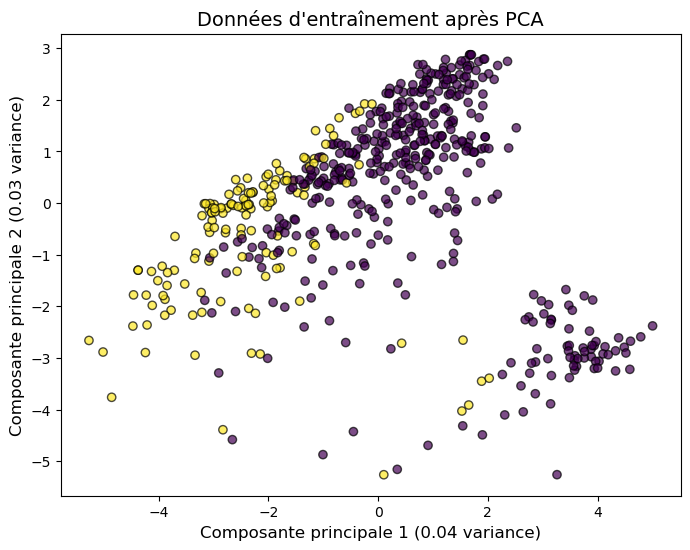

In [96]:
import matplotlib.pyplot as plt
#  PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
# Visualiser les données réduites en 2D
plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train_encoded, cmap='viridis', edgecolors='k', alpha=0.7)
# Ajouter des titres et des labels
plt.title('Données d\'entraînement après PCA', fontsize=14)
plt.xlabel(f'Composante principale 1 ({pca.explained_variance_ratio_[0]:.2f} variance)', fontsize=12)
plt.ylabel(f'Composante principale 2 ({pca.explained_variance_ratio_[1]:.2f} variance)', fontsize=12)

plt.show()

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


svm = SVC(C=10, gamma='scale', kernel='rbf', random_state=42)

#  cross-validation 
cv_scores = cross_val_score(svm, x_train_scaled, y_train_encoded, cv=5, scoring='f1')

#  F1 pour chaque fold
print("Cross-validation F1-scores : ", cv_scores)

# Entraîner le modèle sur les données d'entraînement
svm.fit(x_train_scaled, y_train_encoded)

# Prédictions sur l'ensemble de test
y_pred = svm.predict(x_test_scaled)

accuracy = accuracy_score(y_test_encoded, y_pred)
# Affichage du rapport de classification

print("Classification Report :")
print(classification_report(y_test_encoded, y_pred))

print(f"Accuracy : {accuracy}")

Cross-validation F1-scores :  [0.90909091 0.7755102  0.87272727 0.92592593 0.84210526]
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        91
           1       0.92      0.90      0.91        50

    accuracy                           0.94       141
   macro avg       0.93      0.93      0.93       141
weighted avg       0.94      0.94      0.94       141

Accuracy : 0.9361702127659575


In [100]:
#C : Le paramètre de régularisation. Plus C est grand, moins il y a d'erreurs de classification dans les données d'entraînement.
#kernel : Le type de noyau utilisé pour transformer les données. Peut être linéaire, polynomial, RBF, ou sigmoïde.
#gamma : Pour les noyaux non linéaires (notamment RBF), il définit l'influence d'un point de données:"scale ,auto ,ou val numérique.


Matrice de confusion :
 [[89  2]
 [26 24]]


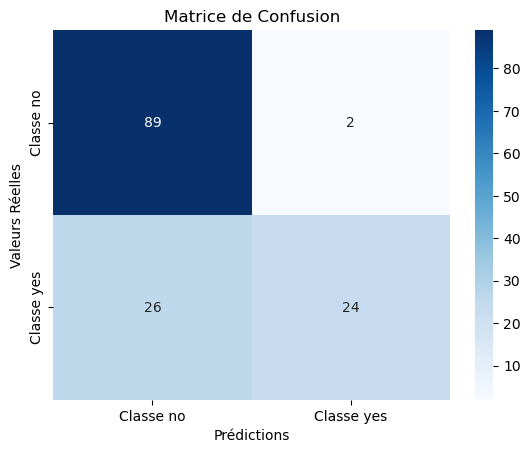

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test_encoded, y_pred)

# Affichage de la matrice de confusion
print("Matrice de confusion :\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Classe no", "Classe yes"], yticklabels=["Classe no", "Classe yes"])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()


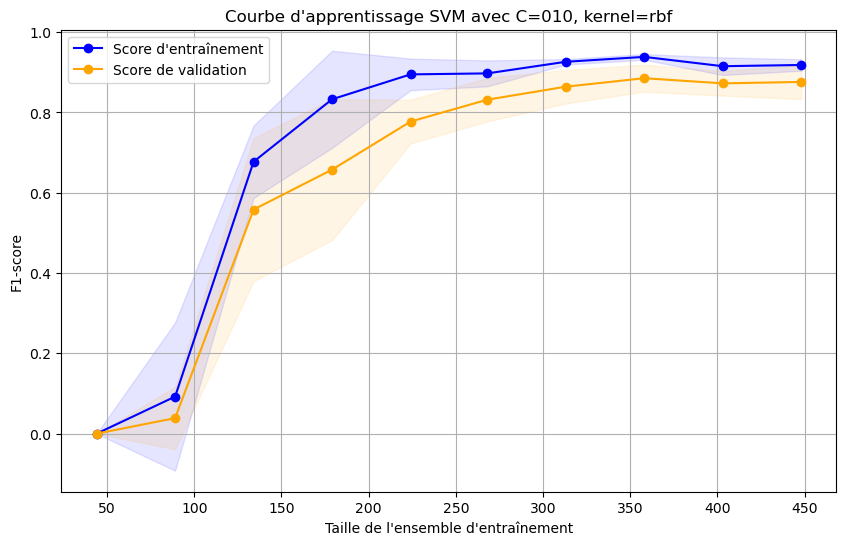

In [104]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Définir le modèle SVM
svm = SVC(kernel='rbf', C=10, random_state=42)

# Fonction pour tracer la courbe d'apprentissage
def plot_learning_curve(model, X, y, title, cv=10, train_sizes=np.linspace(0.1, 1.0, 10)):
    # Utilisation de learning_curve pour calculer les scores
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, train_sizes=train_sizes, scoring='f1', n_jobs=-1
    )

    # Calculer les moyennes et les écarts-types
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Création du graphique
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Taille de l'ensemble d'entraînement")
    plt.ylabel("F1-score")
    plt.grid()

    # Dessiner les courbes et les zones d'incertitudes
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Score d'entraînement")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Score de validation")

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="orange")

    plt.legend(loc="best")
    plt.show()

#  la courbe d'apprentissage avec la validation croisée
plot_learning_curve(svm, x_train_encoded, y_train_encoded, title="Courbe d'apprentissage SVM avec C=010, kernel=rbf", cv=5)

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm = SVC(C=10, gamma='scale', kernel='poly', random_state=42)

#  cross-validation 
cv_scores = cross_val_score(svm, x_train_scaled, y_train_encoded, cv=5, scoring='f1')

#  F1 pour chaque fold
print("Cross-validation F1-scores : ", cv_scores)

#entrainement 
svm.fit(x_train_scaled, y_train_encoded)

# Prédictions sur l'ensemble de test
y_pred = svm.predict(x_test_scaled)
accuracy = accuracy_score(y_test_encoded, y_pred)
# rapport de classification
print("Classification Report :")
print(classification_report(y_test_encoded, y_pred))
print(f"Accuracy : {accuracy}")

Cross-validation F1-scores :  [0.82352941 0.59090909 0.7826087  0.6        0.73076923]
Classification Report :
              precision    recall  f1-score   support

           0       0.77      0.98      0.86        91
           1       0.92      0.48      0.63        50

    accuracy                           0.80       141
   macro avg       0.85      0.73      0.75       141
weighted avg       0.83      0.80      0.78       141

Accuracy : 0.8014184397163121


In [106]:
#  rappel pour la classe 1 très faible nb rappel:vp/vp +fn
#-> le modèle n'identifie pas bien les échantillons de la classe 1

Matrice de confusion :
 [[87  4]
 [ 5 45]]


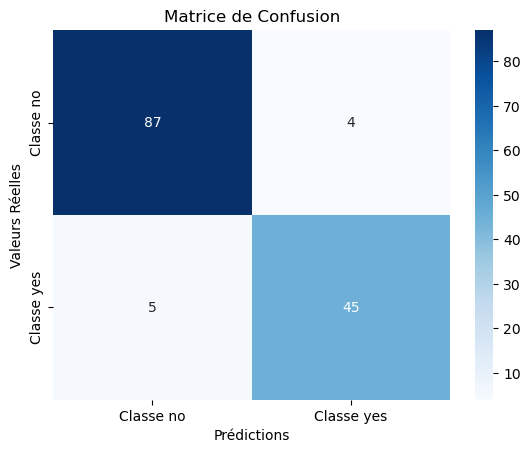

In [110]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de confusion
cm1 = confusion_matrix(y_test_encoded, y_pred)

#  la matrice de confusion
print("Matrice de confusion :\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Classe no", "Classe yes"], yticklabels=["Classe no", "Classe yes"])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()


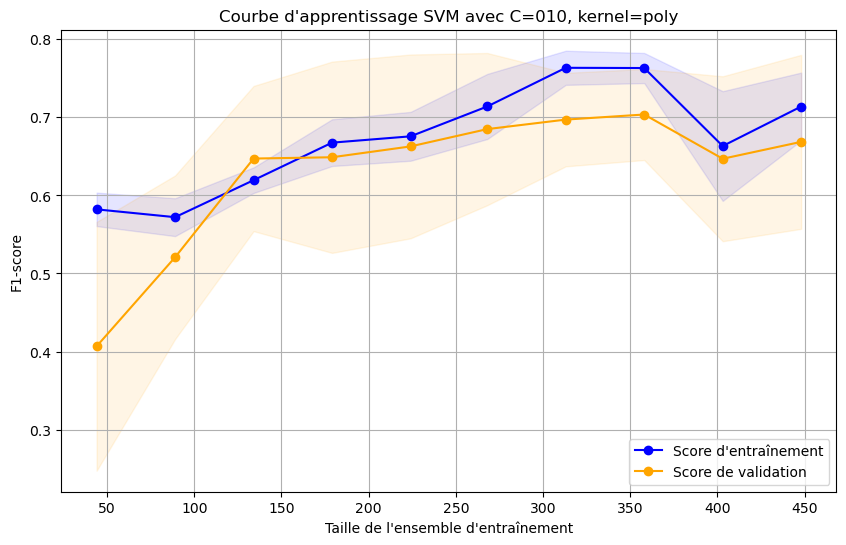

In [113]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Définir le modèle SVM
svm = SVC(kernel='poly', C=10, random_state=42)

# Fonction pour tracer la courbe d'apprentissage
def plot_learning_curve(model, X, y, title, cv=10, train_sizes=np.linspace(0.1, 1.0, 10)):
    # Utilisation de learning_curve pour calculer les scores
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, train_sizes=train_sizes, scoring='f1', n_jobs=-1
    )

    # Calcul des moyennes et dees écarts-types:
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Création du graphique
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Taille de l'ensemble d'entraînement")
    plt.ylabel("F1-score")
    plt.grid()

    # Dessiner les courbes et les zones d'incertitudes
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Score d'entraînement")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Score de validation")

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="orange")

    plt.legend(loc="best")
    plt.show()

#  la courbe d'apprentissage 
plot_learning_curve(svm, x_train_encoded, y_train_encoded, title="Courbe d'apprentissage SVM avec C=010, kernel=poly", cv=5)

In [ ]:
#-> on choisit svm = SVC(C=10, gamma='scale', kernel='poly')
#Il capture mieux les relations non linéaires.
#Il minimise le risque de surapprentissage tout en conservant une bonne performance.
